## Question of interest: What working scenario would give the best total compensation per year?

In [35]:
# basic libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
## read in all 5 FAANG company data and combine them into one.
facebook = pd.read_csv('data/facebook.csv')
netflix = pd.read_csv('data/netflix.csv')
amazon = pd.read_csv('data/amazon.csv')
apple = pd.read_csv('data/apple.csv')
google = pd.read_csv('data/google.csv')

arr = [facebook, netflix, amazon, apple, google]
faang_eda = pd.concat(arr)

[Text(0.5, 0, 'Company'), Text(0, 0.5, 'Count')]

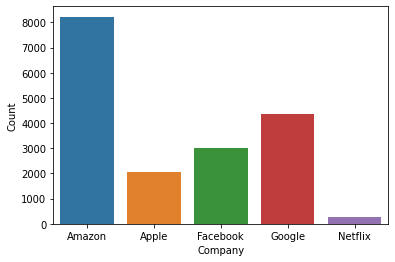

In [37]:
## make count bar plot of companies
comp = [facebook, netflix, amazon, apple, google]
count = pd.concat(comp)

df = count.groupby("company").count().reset_index()
comp_count = sns.barplot(x = "company", y = "title", data = df)
comp_count.set(xlabel = 'Company', ylabel = 'Count')



## Additional data cleaning

In [38]:
## cleaning of education variables

## find duplicates of people with masters degree and doctorate degrees
ms_phd = faang_eda[(faang_eda["Masters_Degree"] == 1) & (faang_eda["Doctorate_Degree"] == 1)]

# change duplicates to zeros and only select the higher degree
ms_phd["Masters_Degree"] = 0
phd = ms_phd

# remove the duplicates and add on the higher degree
faang_eda.drop(ms_phd.index, axis = 0)
faang = pd.concat([faang_eda, phd])

##  find duplicates of people with bachelors and masters degrees
bs_ms = faang_eda[(faang_eda["Bachelors_Degree"] == 1) & (faang_eda["Masters_Degree"] == 1)]

# change duplicates to zeros and only select the higher degree
bs_ms["Bachelors_Degree"] = 0
ms = bs_ms

# remove the duplicates and add on the higher degree
faang_eda.drop(bs_ms.index, axis = 0)
faang = pd.concat([faang_eda, ms])

C:\Users\jacob\AppData\Local\Temp/ipykernel_10188/661345030.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ms_phd["Masters_Degree"] = 0
C:\Users\jacob\AppData\Local\Temp/ipykernel_10188/661345030.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bs_ms["Bachelors_Degree"] = 0


In [39]:
## drop other rows with zero values
zerosalary = faang_eda[faang_eda["basesalary"] == 0]
faang_eda = faang_eda.drop(zerosalary.index, axis = 0)

## create education column ("undummy" the variables)
education = faang_eda[["Masters_Degree", "Bachelors_Degree", "Doctorate_Degree", "Highschool", "Some_College"]].eq(1).idxmax(axis = 1)
faang_eda["education"] = education
# reset index
faang_eda = faang_eda.reset_index().drop('index', axis=1)
faang_eda

,company,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,basesalary,bonus,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,education
0,Facebook,Software Engineer,600000,"Menlo Park, CA",10.0,1.0,215000.0,40000.0,0,0,0,0,0,Masters_Degree
1,Facebook,Software Engineer,690000,"Seattle, WA",11.5,4.0,200000.0,40000.0,0,0,0,0,0,Masters_Degree
2,Facebook,Software Engineer,450000,"Menlo Park, CA",7.0,3.0,190000.0,30000.0,0,0,0,0,0,Masters_Degree
3,Facebook,Software Engineer,230000,"London, EN, United Kingdom",5.0,1.0,134000.0,27000.0,0,0,0,0,0,Masters_Degree
4,Facebook,Software Engineer,250000,"Menlo Park, CA",5.0,0.0,160000.0,1600.0,0,0,0,0,0,Masters_Degree
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14792,Google,Software Engineer,238000,"Seattle, WA",2.0,0.0,131000.0,19650.0,0,0,0,0,0,Masters_Degree
14793,Google,Software Engineer,220000,"San Bruno, CA",2.0,0.0,140000.0,28000.0,0,0,0,0,0,Masters_Degree
14794,Google,Software Engineer,215000,"Mountain View, CA",2.0,2.0,132000.0,23000.0,0,0,0,0,0,Masters_Degree
14795,Google,Software Engineer,169000,"San Bruno, CA",0.0,0.0,125000.0,18750.0,0,0,0,0,0,Masters_Degree


## Exploratory data analysis

In [40]:
# see if missing values exist
faang_eda.isna().sum()

company                    0
title                      0
totalyearlycompensation    0
location                   0
yearsofexperience          0
yearsatcompany             0
basesalary                 0
bonus                      0
Masters_Degree             0
Bachelors_Degree           0
Doctorate_Degree           0
Highschool                 0
Some_College               0
education                  0
dtype: int64

In [41]:
# data set summary
faang_eda.describe()

,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,bonus,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College
count,1.479700e+04,14797.000000,14797.000000,14797.000000,14797.000000,14797.000000,14797.000000,14797.000000,14797.000000,14797.000000
mean,2.635540e+05,7.206653,2.240221,150494.416571,24014.653916,0.269987,0.189903,0.044333,0.005474,0.004933
std,1.576805e+05,5.766760,2.604763,51108.091234,31372.488267,0.443968,0.392238,0.205842,0.073787,0.070067
min,1.000000e+04,0.000000,0.000000,9000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.750000e+05,3.000000,0.000000,125000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.300000e+05,6.000000,1.000000,150000.000000,20000.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.120000e+05,10.000000,3.000000,170000.000000,30000.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,4.980000e+06,42.000000,20.000000,800000.000000,555000.000000,1.000000,1.000000,1.000000,1.000000,1.000000


[Text(0.5, 0, 'Company'), Text(0, 0.5, 'Total Yearly Compensation ($)')]

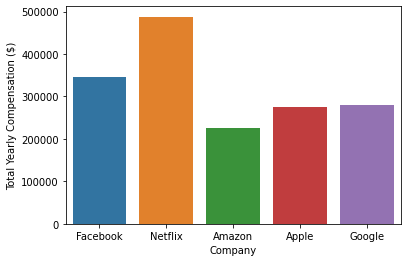

In [42]:
## bar plot of total yearly compensation and companies
company_plt = sns.barplot(x = "company", y = "totalyearlycompensation", data = faang_eda, ci = None)
company_plt.set(xlabel = 'Company', ylabel = 'Total Yearly Compensation ($)')

C:\Users\jacob\AppData\Local\Temp/ipykernel_10188/2801283058.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  yrs_exp_plt.set_yticklabels(['0', '0', '100000', '200000', '300000', '400000', '500000'])


[Text(0.5, 0, 'Years of Experience'),
 Text(0, 0.5, 'Total Yearly Compensation ($)')]

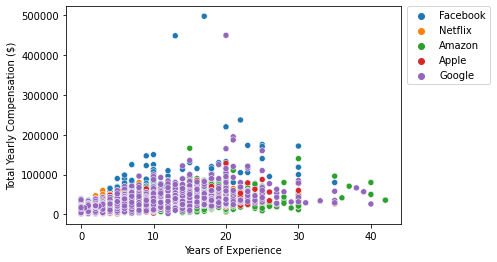

In [44]:
## years of experience vs total yearly compensation plot

# create plot
yrs_exp_plt = sns.scatterplot(x = "yearsofexperience", y = "totalyearlycompensation", data = faang_eda, ci = None, hue = "company")

# set axis ticks, legend position and axis labels
yrs_exp_plt.set_yticklabels(['0', '0', '100000', '200000', '300000', '400000', '500000'])
plt.legend(bbox_to_anchor = (1.02, 1), loc = 'upper left', borderaxespad = 0)
yrs_exp_plt.set(xlabel = 'Years of Experience', ylabel = 'Total Yearly Compensation ($)')

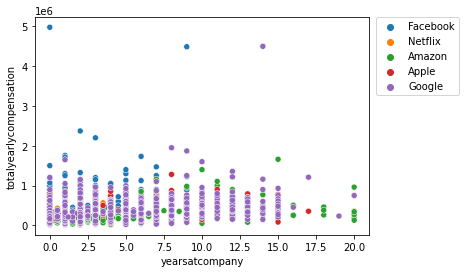

In [45]:
## scatter plot of years at company vs total yearly compensation

# create plot
sns.scatterplot(x = "yearsatcompany", y = "totalyearlycompensation", data = faang_eda, ci = None, hue = "company")

# set legend location
plt.legend(bbox_to_anchor = (1.02, 1), loc = 'upper left', borderaxespad = 0)

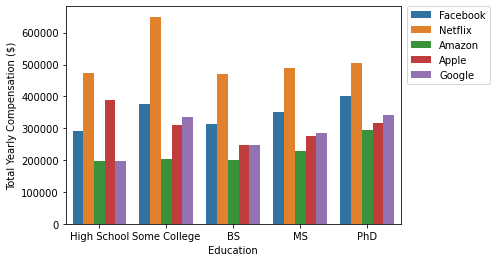

In [46]:
## education vs total yearly compensation plot

# create education plot
edu_plt = sns.barplot(x = "education", y = "totalyearlycompensation", data = faang_eda, ci = None, hue = "company",
                     order = ["Highschool", "Some_College", "Bachelors_Degree", "Masters_Degree", "Doctorate_Degree"])

# change x ticks labels, rename axis labels and change legend location
edu_plt.set_xticklabels(['High School','Some College', 'BS', 'MS','PhD'])
edu_plt.set(xlabel = 'Education', ylabel = 'Total Yearly Compensation ($)')
plt.legend(bbox_to_anchor = (1.02, 1), loc = 'upper left', borderaxespad = 0)

<AxesSubplot:xlabel='totalyearlycompensation', ylabel='Count'>

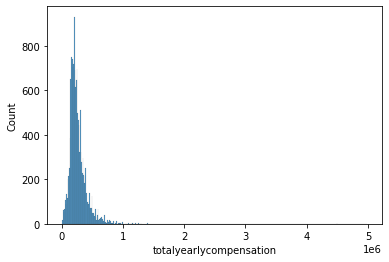

In [47]:
# histogram of yearly total compensation
sns.histplot(x = "totalyearlycompensation", data = faang_eda)

## Create train and test.

In [51]:
# sklearn modeling libraries
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

In [52]:
# create modified data frame for analysis
faang = faang_eda.drop(["location", "education"], axis = 1)

In [53]:
faang = pd.get_dummies(faang, columns = ["company", "title"])

In [54]:
# select X variables
X = faang.drop("totalyearlycompensation", axis = 1)
y = faang["totalyearlycompensation"]

# create train and test datasets
X_train, X_test, y_train, y_test = train_test_split(faang, y, test_size = .25, random_state = 1234)

## Different modeling methods

In [19]:
# get appropriate tuning parameters using GridSearchCV
#############################################
# this takes a really long time to run.
#############################################
# # lm
# pipe_lm_gs = Pipeline(
#     [('preprocessor', preprocessor),
#      ('poly', PolynomialFeatures()),
#      ('lm', LinearRegression())])
# param_grid = [{'poly__degree':[1,2,3]}]
# gs_lm = GridSearchCV(pipe_lm_gs, param_grid, scoring='neg_mean_squared_error')
# gs_lm.fit(X_train, y_train)
# # knn
# pipe_knn_gs = Pipeline(
#     [('preprocessor', preprocessor),
#      ('poly', PolynomialFeatures()),
#      ('knn', KNeighborsRegressor())])
# param_grid = [{'knn__n_neighbors': list(range(1,10)), 'poly__degree':[1,2,3]}]
# gs_knn = GridSearchCV(pipe_knn_gs, param_grid, scoring='neg_mean_squared_error')
# gs_knn.fit(X_train, y_train)
# # lasso
# pipe_lasso_gs = Pipeline(
#     [('preprocessor', preprocessor),
#      ('poly', PolynomialFeatures()),
#      ('lasso', Lasso())])
# param_grid = [{'poly__degree':[1,2,3]}]
# gs_lasso = GridSearchCV(pipe_lasso_gs, param_grid, scoring='neg_mean_squared_error')
# gs_lasso.fit(X_train, y_train)
# # tree
# pipe_tree_gs = Pipeline(
#     [('preprocessor', preprocessor),
#      ('poly', PolynomialFeatures()),
#      ('tree', DecisionTreeRegressor())])
# param_grid = [{'tree__min_samples_leaf': list(range(1,10))}, {'poly__degree':[1,2,3]}]
# gs_tree = GridSearchCV(pipe_tree_gs, param_grid, scoring='neg_mean_squared_error')
# gs_tree.fit(X_train, y_train)

# print('lm: ', gs_lm.best_params_)
# print('knn: ', gs_knn.best_params_)
# print('lasso: ', gs_lasso.best_params_)
# print('tree: ', gs_tree.best_params_)

In [55]:
# linear regression model
lm_pipe = LinearRegression()
lm_pipe.fit(X_train, y_train)
lm_preds = lm_pipe.predict(X_test)

# calculate model metrics
rmse_lm = mean_squared_error(y_test, lm_preds, squared = False)
score_lm = np.mean(cross_val_score(lm_pipe, X_train, y_train, cv=10, scoring='neg_root_mean_squared_error'))*(-1)

# likely assumptions are not met

2.8467565565876175e-10

In [56]:
# knn model
knn_pipe = KNeighborsRegressor(n_neighbors = 10)
knn_pipe.fit(X_train, y_train)
knn_preds = knn_pipe.predict(X_test)

# calculate model metrics
rmse_knn = mean_squared_error(y_test, knn_preds, squared=False)
score_knn = np.mean(cross_val_score(knn_pipe, X_train, y_train, cv=10, scoring='neg_root_mean_squared_error'))*(-1)

C:\Users\jacob\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
C:\Users\jacob\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
C:\Users\jacob\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
C:\Users\jacob\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
C:\Users\jacob\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, b

15803.461720104542

In [57]:
#  lasso model
lasso_pipe = Lasso(alpha = 0.5)
lasso_pipe.fit(X_train, y_train)
lasso_preds = lasso_pipe.predict(X_test)

# calculate model metrics
rmse_lasso = mean_squared_error(y_test, lasso_preds, squared=False)
score_lasso = np.mean(cross_val_score(lasso_pipe, X_train, y_train, cv=10, scoring='neg_root_mean_squared_error'))*(-1)

# likely assumptions are not met

3.3784014691009395e-06

In [58]:
# decision tree model
tree_pipe = DecisionTreeRegressor(min_samples_leaf = 15)
tree_pipe.fit(X_train, y_train) # create model
tree_preds = tree_pipe.predict(X_test)

# calculate model metrics
rmse_tree = mean_squared_error(y_test, tree_preds, squared=False)
score_tree = np.mean(cross_val_score(tree_pipe, X_train, y_train, cv=10, scoring='neg_root_mean_squared_error'))*(-1)

20522.0325581909

In [59]:
# multinomial naive bayes model
nb_pipe = MultinomialNB()
nb_pipe.fit(X_train, y_train)

# create predictions
nb_preds = nb_pipe.predict(X_test)
rmse_nb = mean_squared_error(y_test, nb_preds, squared=False)
score_nb = np.mean(cross_val_score(nb_pipe, X_train, y_train, cv=10, scoring='neg_root_mean_squared_error'))*(-1)

C:\Users\jacob\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


In [60]:
# forest model
forest_pipe = RandomForestClassifier(n_estimators = 100, n_jobs = -1, max_depth = 10)
forest_pipe.fit(X_train, y_train)
forest_preds = forest_pipe.predict(X_test)

# calculate model metrics
rmse_forest = mean_squared_error(y_test, forest_preds, squared=False)
score_forest = np.mean(cross_val_score(forest_pipe, X_train, y_train, cv=10, scoring='neg_root_mean_squared_error'))*(-1)

C:\Users\jacob\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


In [61]:
# results from various models
print('Linear Model:')
print('rmse: ', rmse_lm)
print('cv: ', score_lm)
print(' ')

print('KNN Model:')
print('rmse: ', rmse_knn)
print('cv: ', score_knn)
print(' ')

print('Lasso:')
print('rmse: ', rmse_lasso)
print('cv: ', score_lasso)
print(' ')

print('Tree Regressor:')
print('rmse: ', rmse_tree)
print('cv: ', score_tree)
print(' ')

print('Forest:')
print('rmse: ', rmse_forest)
print('cv: ', score_forest)
print(' ')

print('Naive Bayes: ')
print('rmse: ', rmse_nb)
print('cv: ', score_nb)

Linear Model:
rmse:  7.362988708711129e-10
cv:  2.8467565565876175e-10
 
KNN Model:
rmse:  62610.592543503764
cv:  15803.461720104542
 
Lasso:
rmse:  4.239566307252631e-06
cv:  3.3784014691009395e-06
 
Tree Regressor:
rmse:  68087.21755274128
cv:  20522.0325581909
 
Forest:
rmse:  117870.44830855382
cv:  79758.59977031744
 
Naive Bayes: 
rmse:  143560.01764258926
cv:  147268.57615946242


KNN gave the lowest RMSE, but it's results are not very interpretable, therefore we will go with the second best model which was the decision tree with 15 leaves. Its variable importance features are given below.

In [62]:
# decision tree variable importance values
coef_df = pd.DataFrame()
coef_df["Column_Name"] = X_train.columns
coef_df['Coef_Values'] = pd.Series(tree_pipe.feature_importances_)
lowest_coef = coef_df.sort_values('Coef_Values', ascending=True).head(5)
highest_coef = coef_df.sort_values('Coef_Values', ascending=True).tail(21)

important_coef_df = pd.concat([highest_coef, lowest_coef]).sort_values('Coef_Values', ascending = False)
important_coef_df

,Column_Name,Coef_Values
0,totalyearlycompensation,9.999990e-01
4,bonus,3.409791e-07
3,basesalary,2.525693e-07
2,yearsatcompany,1.242664e-07
26,title_Software Engineer,1.220366e-07
1,yearsofexperience,8.235010e-08
12,company_Facebook,7.951832e-08
13,company_Google,2.541658e-08
10,company_Amazon,5.009744e-09
5,Masters_Degree,8.188434e-10
